In [1]:
from HGTrobots import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [2]:
numBots = 10
width = 100
height = 100
maxV = 1.0
n = 2
robots = []
for i in range(numBots):
    rx = np.random.randint(0,width)
    ry = np.random.randint(0,height)
    rW = np.random.random((5*n,2))-0.5
    r = robot(rx, ry, 4.0, n, maxV)
    r.W = rW
    robots.append(r)

In [3]:
#### test simulation
xList = []
yList = []
angleList = []
iters = 100
itersPerUpdate = 10
iterCount = itersPerUpdate
for i in range(iters):
    x = []
    y = []
    angles = []
    
    for j in range(len(robots)):
        
        x.append(robots[j].x)
        y.append(robots[j].y)
        angles.append(robots[j].theta)
        
        robots[j].takeAction()
        if(iterCount <= 0):
            robots[j].calcSense(robots)
            robots[j].calcAction()
            
    if(iterCount <= 0):
        iterCount = itersPerUpdate
    
    iterCount -= 1
    
    xList.append(x)
    yList.append(y)
    angleList.append(angles)

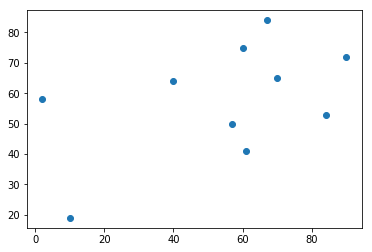

In [4]:
### animate sim

arrowScale = 8.0

def update_plot(i, dx, dy, ax, ar, angleList):
    
    vertices = np.zeros((len(dx[0]), 2))
    
    for j in range(len(dx[i])):
        vertices[j,0] = dx[i][j]
        vertices[j,1] = dy[i][j]
    
    
    ax.set_offsets(vertices)
    return ax,

fig = plt.figure()
arrows = []
ax = plt.scatter(xList[0], yList[0])

ani = animation.FuncAnimation(fig, update_plot, frames=len(xList),
                              fargs=(xList, yList, ax, arrows, angleList))
plt.show()

In [5]:
HTML(ani.to_html5_video())